<a href="https://colab.research.google.com/github/Void3604/MLlab/blob/main/Q10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Distribution of housing prices:
count     206

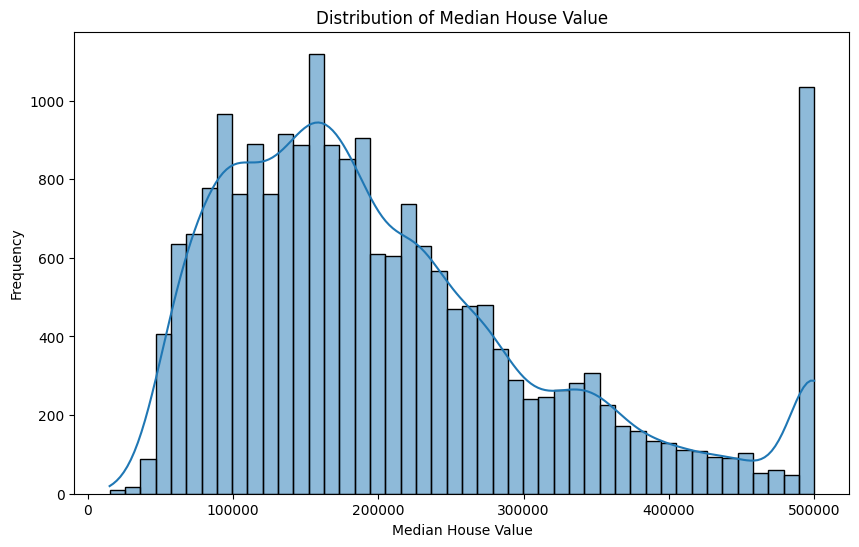

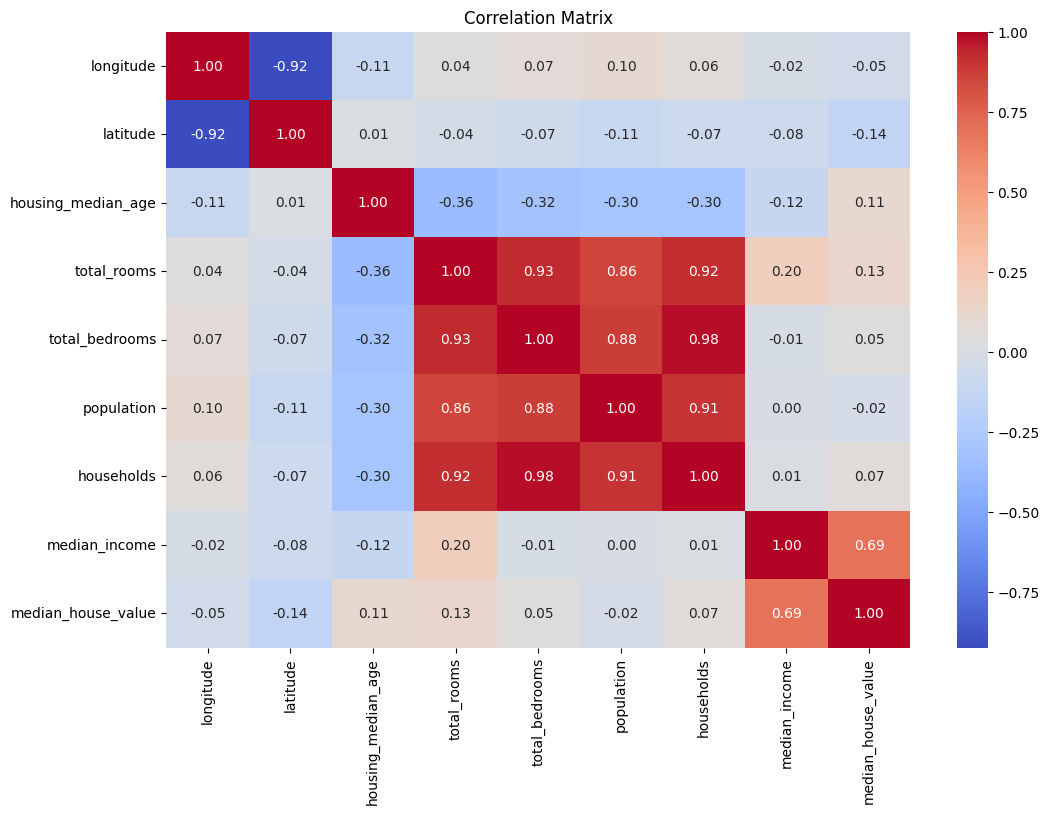


Covariance matrix:
                       longitude      latitude  housing_median_age  \
longitude               4.014139     -3.957054           -2.728244   
latitude               -3.957054      4.562293            0.300346   
housing_median_age     -2.728244      0.300346          158.396260   
total_rooms           194.803750   -168.217847        -9919.120060   
total_bedrooms         58.768508    -60.299623        -1700.312817   
population            226.377839   -263.137814        -4222.270582   
households             42.368072    -58.010245        -1457.581290   
median_income          -0.057765     -0.323860           -2.846140   
median_house_value -10627.425205 -35532.559074       153398.801329   

                     total_rooms  total_bedrooms    population    households  \
longitude           1.948037e+02    5.876851e+01  2.263778e+02  4.236807e+01   
latitude           -1.682178e+02   -6.029962e+01 -2.631378e+02 -5.801024e+01   
housing_median_age -9.919120e+03   -1.7

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/drive/MyDrive/housing.csv")

print("First 5 rows of the dataset:")
print(df.head())

print("\nDistribution of housing prices:")
print(df['median_house_value'].describe())

print("\nCheck for null values:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# Exclude categorical columns for correlation
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

print("\nCovariance matrix:")
print(df_numeric.cov())

print("\nCorrelation matrix:")
print(df_numeric.corr())


df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

X = df_encoded.drop(['median_house_value'], axis=1)
y = df_encoded['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")